## DS 5500 - Forest Fires Project
Gopalika Sharma and Surya Menon

### Portugal Dataset
This file conducts exploratory data analyis and modeling on the Portugal forest fires [dataset](https://archive.ics.uci.edu/ml/datasets/Forest+Fires). 

#### REFERENCES:
- http://cs229.stanford.edu/proj2019aut/data/assignment_308832_raw/26582553.pdf
- https://medium.com/@tanmayjain84/forest-fire-prediction-with-the-help-of-multiple-regression-models-to-get-the-best-accurate-model-13f8446e4737
- https://medium.com/machine-learning-bootcamp/natural-calamity-classifying-forest-fire-damage-c4139acfc009
- https://developers.arcgis.com/python/sample-notebooks/fighting-california-forest-fires-using-spatial-analysis/

### Exploratory Data Analysis

In [3]:
# load packages
import pandas as pd
import numpy as np
from scipy import stats
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from scipy.stats import zscore
import plotly.express as px 
import tensorflow as tf
sns.set()

In [4]:
# load Portugal fire data
po_ds = pd.read_csv("/Users/gopalika14/Desktop/forestfires.csv")
print(po_ds.shape)
po_ds.head()

(517, 13)


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [5]:
# summary stats
po_ds.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [6]:
po_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [7]:
# no missing data
po_ds.isnull().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

#### Visualizing target feature (`area`)

<IPython.core.display.Javascript object>


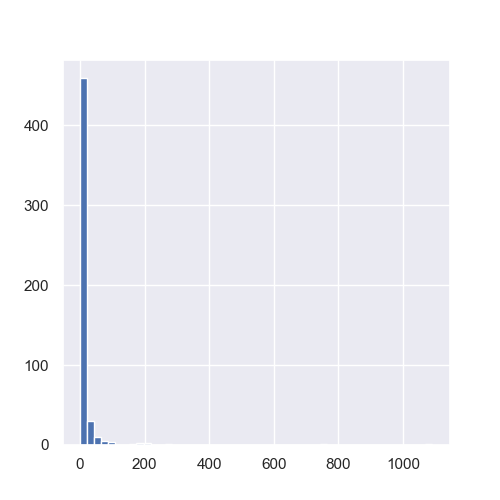

In [8]:
# distribution area
plt.figure(figsize=(5,5))
po_ds['area'].hist(bins=50);

<IPython.core.display.Javascript object>


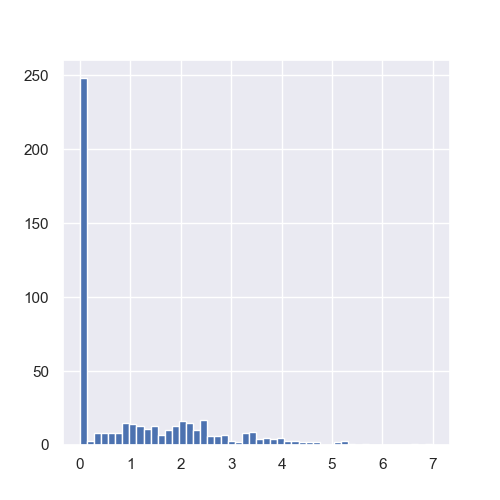

In [9]:
# log distribution
plt.figure(figsize=(5,5))
np.log(po_ds['area']+1).hist(bins=50);

<IPython.core.display.Javascript object>


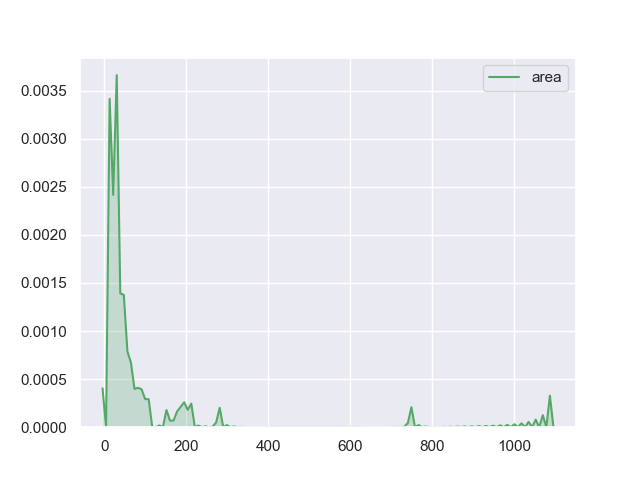

In [10]:
# area - density plot
sns.kdeplot(po_ds['area'],shade=True,color='g');

In [11]:
# possible outliers for area discovered from the visualisation above
po_ds[abs(zscore(po_ds['area'])) >= 3 ]

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
237,1,2,sep,tue,91.0,129.5,692.6,7.0,18.8,40,2.2,0.0,212.88
238,6,5,sep,sat,92.5,121.1,674.4,8.6,25.1,27,4.0,0.0,1090.84
415,8,6,aug,thu,94.8,222.4,698.6,13.9,27.5,27,4.9,0.0,746.28
479,7,4,jul,mon,89.2,103.9,431.6,6.4,22.6,57,4.9,0.0,278.53


<IPython.core.display.Javascript object>


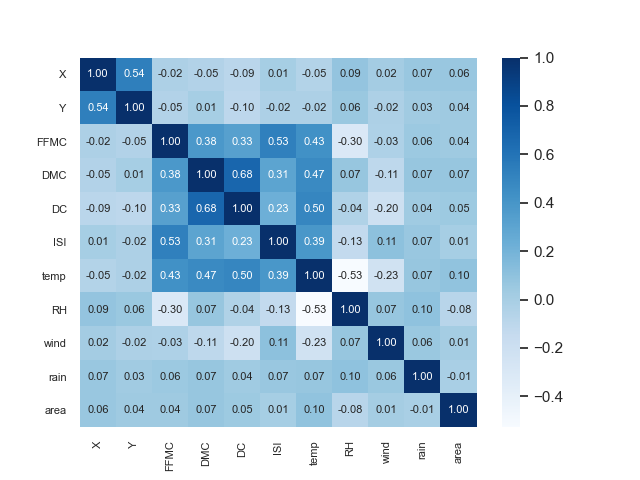

In [12]:
# correlation
sns.heatmap(po_ds.corr(), fmt='.2f', annot=True, annot_kws={"fontsize":8}, cmap="Blues")
plt.xticks(fontsize=8)
plt.yticks(fontsize=8);

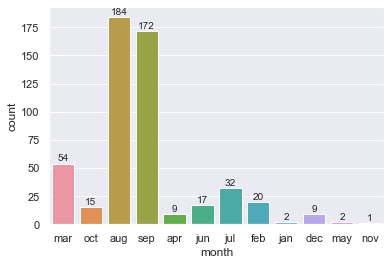

In [13]:
# fires by month
%matplotlib inline
ax=sns.countplot(x=po_ds['month'])
for p in ax.patches:
    ax.annotate("%.f" % p.get_height(), xy=(p.get_x()+p.get_width()/2, p.get_height()),
            xytext=(0, 5), textcoords='offset points', ha="center", va="center");

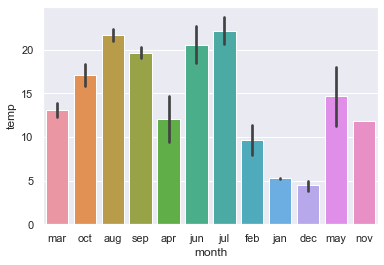

In [14]:
# month and temperature
sns.barplot(x = 'month', y = 'temp', data = po_ds);

#### Observation 1: The number of cases are directly proportional to the temperature for that respective month

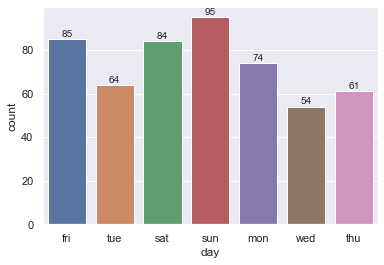

In [15]:
# day of week distribution
ax=sns.countplot(x=po_ds['day'])
for p in ax.patches:
    ax.annotate("%.f" % p.get_height(), xy=(p.get_x()+p.get_width()/2, p.get_height()),
            xytext=(0, 5), textcoords='offset points', ha="center", va="center");

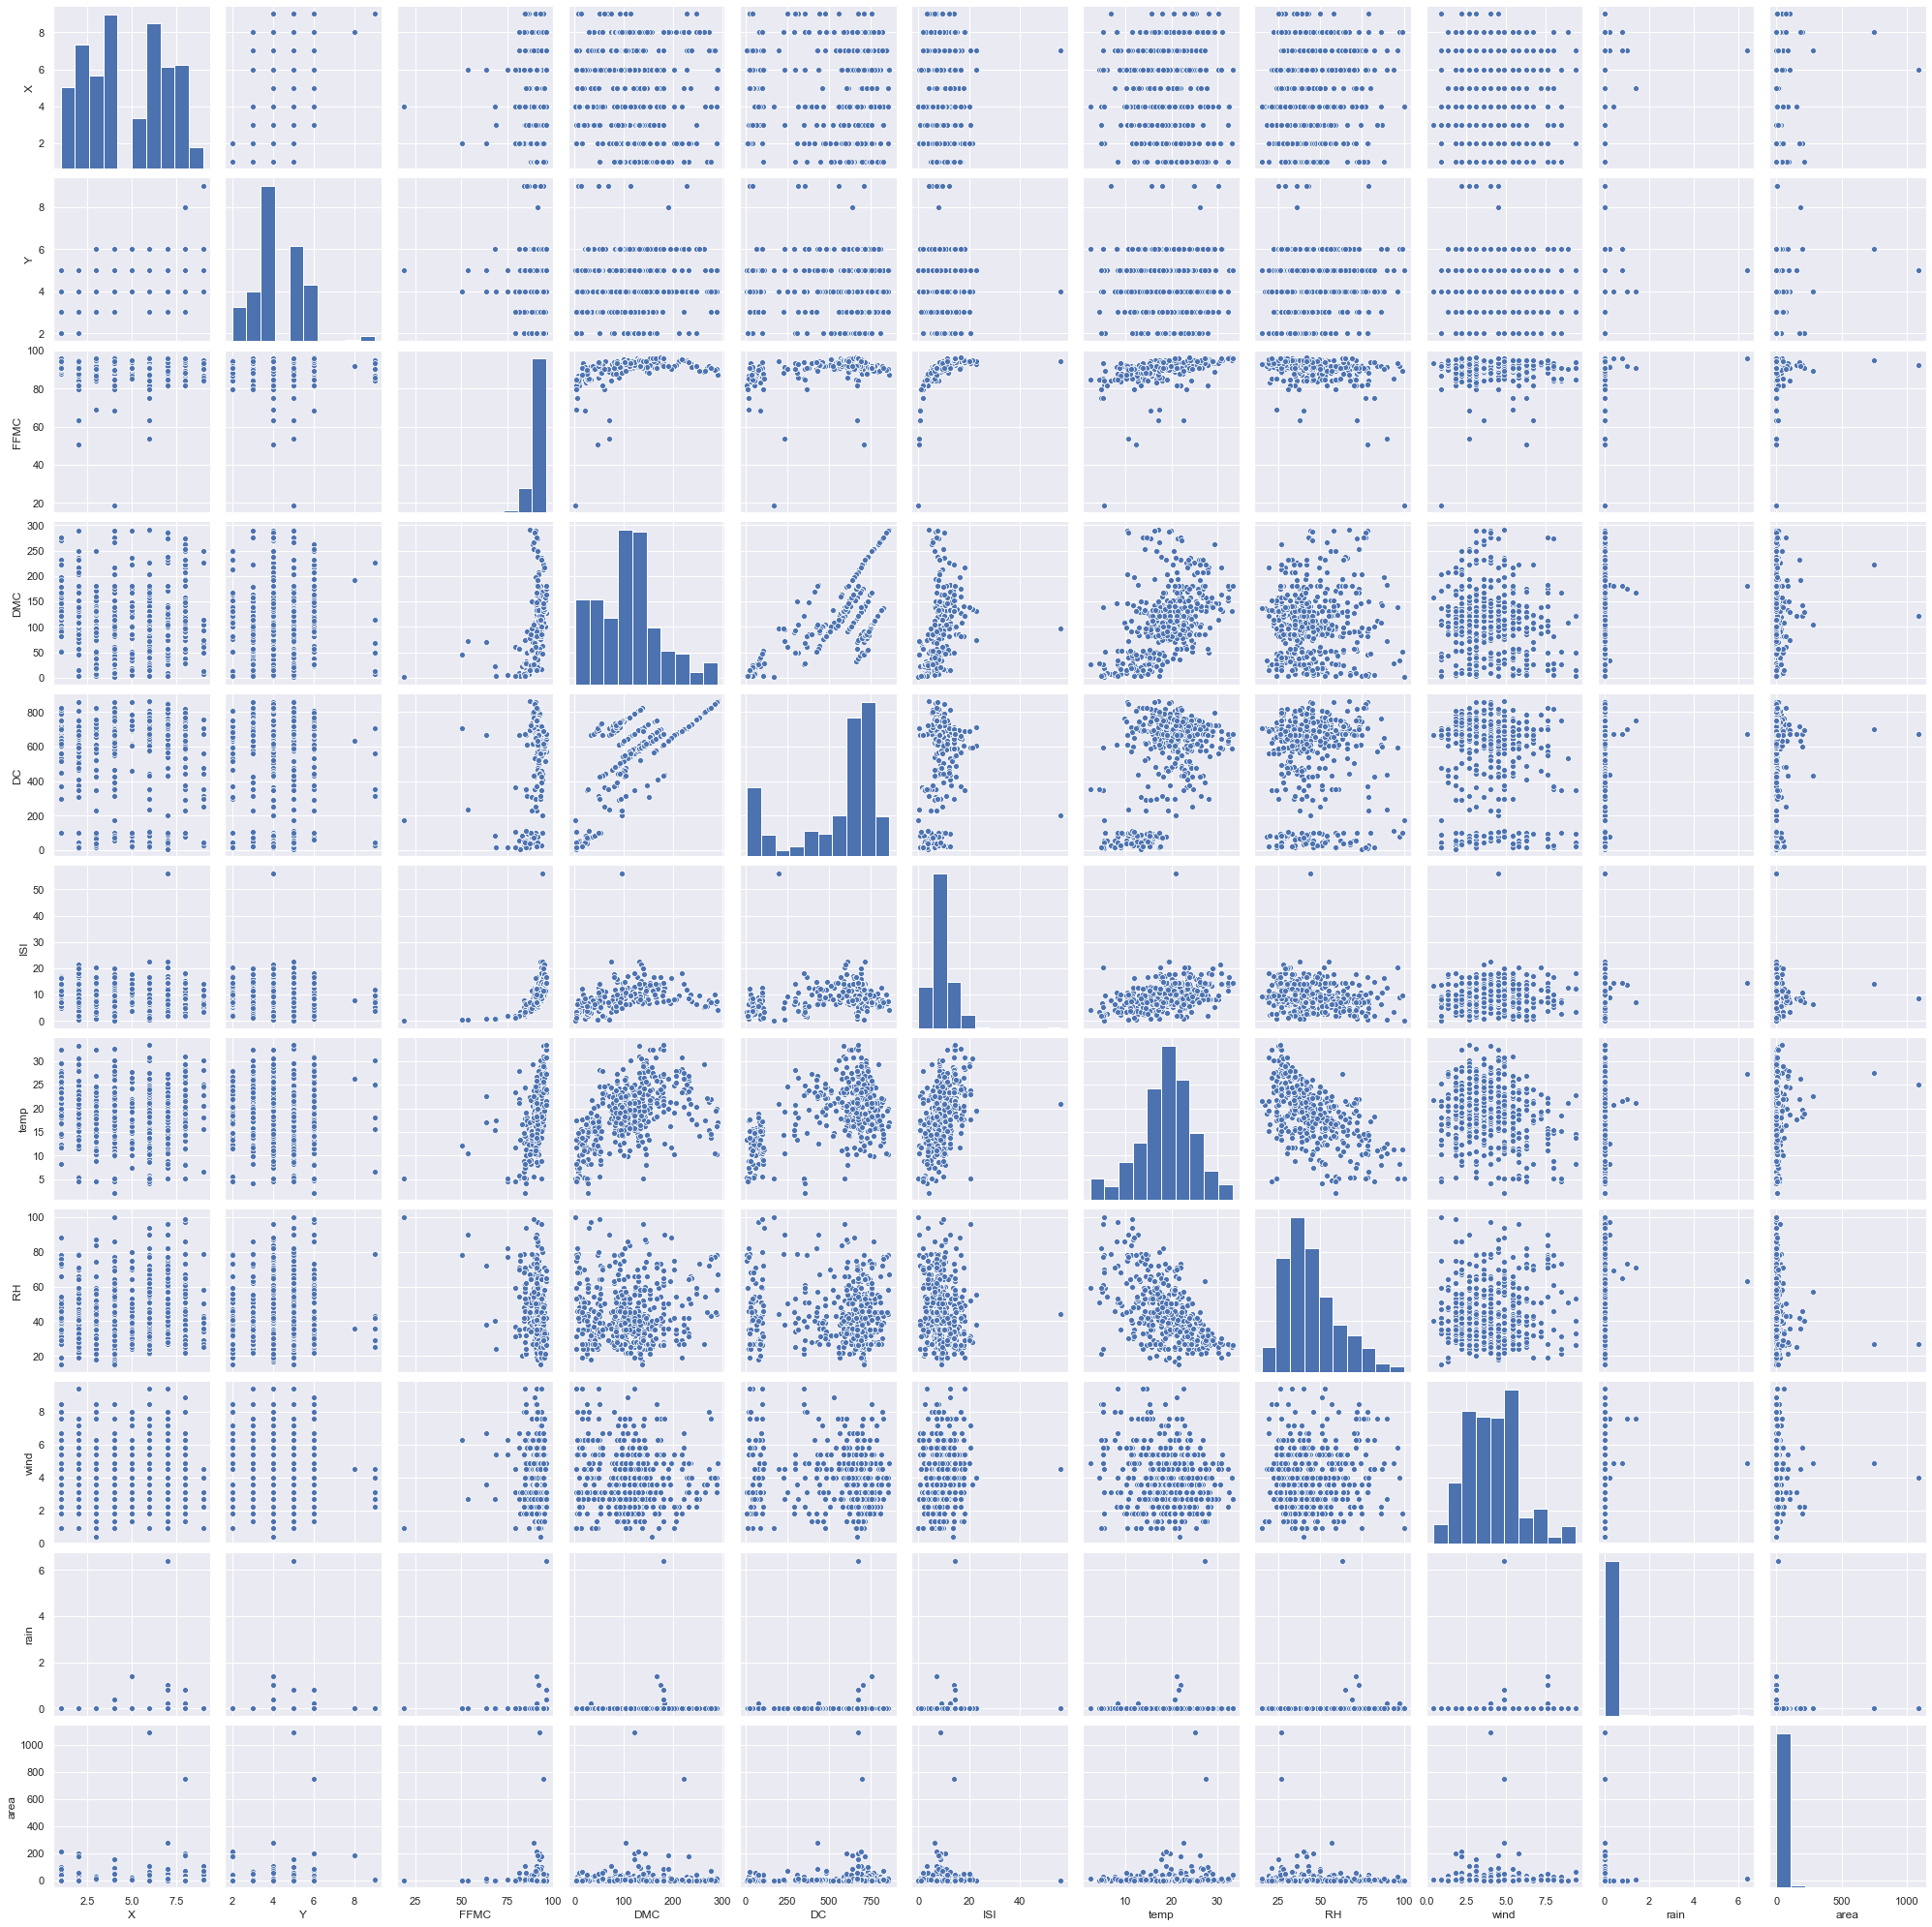

In [16]:
# all numeric features pairwise
sns.pairplot(po_ds);

/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


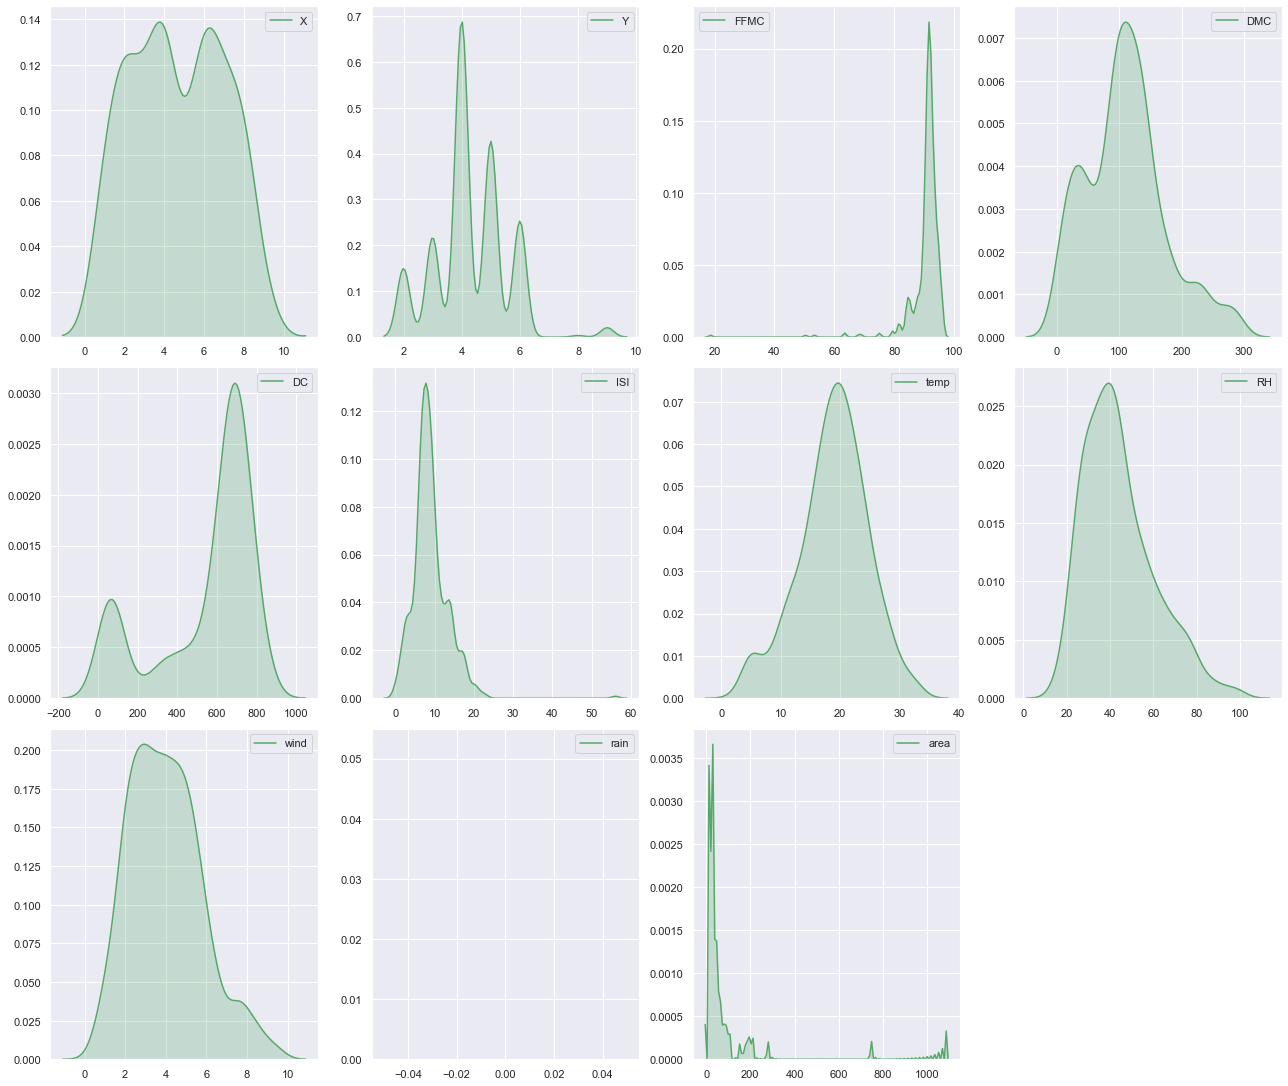

In [17]:
# numeric features distribution
num_columns = ['X','Y', 'FFMC','DMC','DC','ISI','temp','RH','wind','rain','area']
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(po_ds[col],color='g',shade=True)
plt.tight_layout() 
plt.show()

In [18]:
# lat/long - create basic mapping of incidents
# portugal.plot(kind="scatter", x="X", y="Y", alpha=0.4);

### Modeling
We attempt to predict fire `area` via regresson methods. Since this dataset is so small, we focus more on the cross validation results. Based on: https://towardsdatascience.com/5-reasons-why-you-should-use-cross-validation-in-your-data-science-project-8163311a1e79 

In [1]:
# load modeling/preprocessing packages
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import svm
from sklearn.model_selection import train_test_split
import xgboost as xgb

In [28]:
# load model evaluation packages
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

In [19]:
# encode categorical features
po_ds = pd.get_dummies(po_ds,columns=['day','month'],drop_first=True)
po_ds.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,0,1,0,0,0,0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,0,1,0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,0,1,0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,0,1,0,0,0,0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,0,1,0,0,0,0


In [20]:
# can focus on cross validation - since such small dataset 
X,y = po_ds.drop(columns=['area']), po_ds['area']

trainX, testX, trainY, testY = train_test_split(X,y, train_size=0.8, random_state=42, shuffle=True)

In [21]:
# scale data
scaler_port = StandardScaler()
scaler_port.fit(trainX)

trainX_scale = scaler_port.transform(trainX)
testX_scale = scaler_port.transform(testX)

In [29]:
# method to evaluate models
def fit_model(model, X, y):
    model.fit(X, y)
    preds = model.predict(X)
    print('Train MAE:', mean_absolute_error(y, preds))
    print("Train MSE:", mse(y,preds))
    cv_scores = cross_val_score(model,X,y, scoring='neg_mean_absolute_error', cv=10)
    print('Average CV MAE:', cv_scores.mean()*-1)

### Linear Regression

In [30]:
po_lreg = LinearRegression()
fit_model(po_lreg, trainX_scale, trainY)

Train MAE: 16.569126327662133
Train MSE: 1976.09357861925
Average CV MAE: 18.16111228437041


In [31]:
# lr test
lr_preds_test = po_lreg.predict(testX_scale)
print('Test MAE:', mean_absolute_error(testY, lr_preds_test))
print("Test MSE =", mse(testY, lr_preds_test))
print("R2 Score =", r2_score(testY, lr_preds_test))

Test MAE: 24.526692236653183
Test MSE = 11613.674532130444
R2 Score = 0.014768502010551687


### Decision Tree Regressor

In [32]:
po_dt = DecisionTreeRegressor()
fit_model(po_dt, trainX_scale, trainY)

Train MAE: 0.08251815980629541
Train MSE: 0.39014552058111385
Average CV MAE: 27.55848199767712


In [33]:
# Dt test
dt_preds_test = po_dt.predict(testX_scale)
print('Test MAE:', mean_absolute_error(testY, dt_preds_test))
print("Test MSE =", mse(testY, dt_preds_test))
print("R2 Score =", r2_score(testY, dt_preds_test))

Test MAE: 31.14600961538461
Test MSE = 13886.36492235577
R2 Score = -0.17803233388623063


### Random Forest Regressor

In [35]:
po_rf = RandomForestRegressor()
fit_model(po_rf, trainX_scale, trainY)

Train MAE: 7.904051870171799
Train MSE: 474.7603482966119
Average CV MAE: 20.08874636236934


In [36]:
# Random Forest Regressor test
rfr_preds_test = po_rf.predict(testX_scale)
print('Test MAE:', mean_absolute_error(testY, rfr_preds_test))
print("Test MSE =", mse(testY,rfr_preds_test))
print("R2 Score =", r2_score(testY, rfr_preds_test))

Test MAE: 26.520982495421244
Test MSE = 11712.961134089914
R2 Score = 0.006345647787438957


In [37]:
# rf grid search
po_rf_params = {'n_estimators': [100, 200, 300, 400, 500, 600, 700], 
                  'max_features': ['auto', 'sqrt', 'log2', None], 
                  'max_depth': [3,4,5,6,8,10, None],
                  'bootstrap': [True, False]}

rf_port_search = RandomizedSearchCV(po_rf, param_distributions=po_rf_params,
                                   cv=10, random_state=42, scoring='neg_mean_absolute_error')
rf_port_search.fit(trainX_scale, trainY)

print("Best Hyperparameters:",rf_port_search.best_params_)
print("Best CV score is {}".format(rf_port_search.best_score_*-1))

Best Hyperparameters: {'n_estimators': 100, 'max_features': 'log2', 'max_depth': 4, 'bootstrap': True}
Best CV score is 16.616898833503985


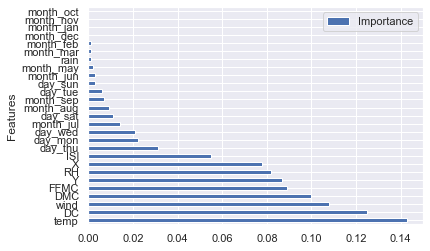

In [38]:
# rf feature importance
rf_feature_import = pd.DataFrame({'Features':trainX.columns,'Importance':np.round(rf_port_search.best_estimator_.feature_importances_,3)}).sort_values('Importance',ascending=False)
rf_feature_import.plot(x='Features',y='Importance',kind='barh');

#### We utilized randomized grid search to determine the best parameters for the Random Forest Regressor. When evaluating this model, we get an improved cross validation score and when looking at feature importance, we identify `temperature` as one of the most contributing features.

### Extra Tree Regressor

In [39]:
# extra tree - another ensemble method
port_et = ExtraTreesRegressor()
fit_model(port_et, trainX_scale, trainY)

Train MAE: 0.08251815980630768
Train MSE: 0.39014552058111385
Average CV MAE: 19.7374637630662


In [40]:
et_preds_test = port_et.predict(testX_scale)
print('Test MAE:', mean_absolute_error(testY, et_preds_test))
print("Test MSE =", mse(testY,et_preds_test))
print("R2 Score =", r2_score(testY, et_preds_test))

Test MAE: 24.48382259615384
Test MSE = 11815.351288486609
R2 Score = -0.0023404924101819713


### Support Vector Machine

In [41]:
# SVM - Support Vector Regressor
po_svm_lin = svm.SVR(kernel='linear')
fit_model(po_svm_lin, trainX_scale, trainY)

Train MAE: 10.794769274436604
Train MSE: 2169.95430569776
Average CV MAE: 11.076262389867427


In [42]:
svr_preds_test = po_svm_lin.predict(testX_scale)
print('Test MAE:', mean_absolute_error(testY, svr_preds_test))
print("Test MSE =", mse(testY,svr_preds_test))
print("R2 Score =", r2_score(testY, svr_preds_test))

Test MAE: 19.944727200524845
Test MSE = 12126.509188688573
R2 Score = -0.028737182215729407


In [43]:
# tune SVM
port_svm_params = {'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
                'C': [0.001, 0.01,0.1, 1, 10, 100, 1000], 
              'gamma': [0.001, 0.01, 0.1, 1,10,100, 'auto', 'scale']}

svm_port_search = RandomizedSearchCV(svm.SVR(), param_distributions=port_svm_params,
                                   cv=10, random_state=42, scoring='neg_mean_absolute_error')
svm_port_search.fit(trainX_scale, trainY)

print("Best Hyperparameters:",svm_port_search.best_params_)
print("Best CV score is {}".format(svm_port_search.best_score_*-1))

Best Hyperparameters: {'kernel': 'linear', 'gamma': 100, 'C': 0.1}
Best CV score is 11.048648245100418


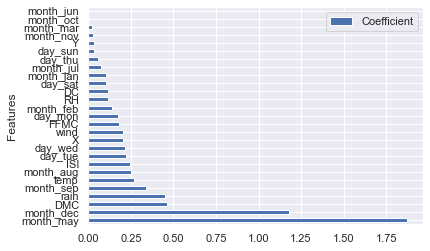

In [44]:
# svm coefficients
svm_feature_import = pd.DataFrame({'Features':trainX.columns,'Coefficient':abs(po_svm_lin.coef_[0])}).sort_values('Coefficient',ascending=False)
svm_feature_import.plot(x='Features',y='Coefficient',kind='barh');

#### We find that linear SVM shows the best cross validation score amongst all the models.

### XGBoost

In [45]:
po_xgb = xgb.XGBRegressor()
fit_model(po_xgb, trainX_scale, trainY)

Train MAE: 0.2273733605282068
Train MSE: 0.44591075539569736
Average CV MAE: 22.95915346084045


In [46]:
# fit boosting algorithm 
po_preds_test = po_xgb.predict(testX_scale)
print('Test MAE:', mean_absolute_error(testY, po_preds_test))
print("Test MSE =", mse(testY,po_preds_test))
print("R2 Score =", r2_score(testY, po_preds_test))

Test MAE: 28.192072485639503
Test MSE = 12953.01269481617
R2 Score = -0.09885256948465848


In [47]:
# tune xgb
port_xgb_params = {'n_estimators': [100, 200, 300, 400, 500, 600, 700],  
                   'learning_rate': [0.045,0.05,0.06],
                  'max_depth': [3,4,5,6,8,10, None]}

xgb_port_search = RandomizedSearchCV(po_xgb, param_distributions=port_xgb_params,
                                   cv=10, random_state=42, scoring='neg_mean_absolute_error')
xgb_port_search.fit(trainX_scale, trainY)

print("Best Hyperparameters:",xgb_port_search.best_params_)
print("Best CV score is {}".format(xgb_port_search.best_score_*-1))

Best Hyperparameters: {'n_estimators': 300, 'max_depth': 4, 'learning_rate': 0.045}
Best CV score is 21.550367815188135


### Dense Neutral Network

In [48]:
# fit initial neural network
po_ds = pd.read_csv("/Users/gopalika14/Desktop/forestfires.csv")
months = pd.get_dummies(po_ds['month'],drop_first=True)
days= pd.get_dummies(po_ds['day'],drop_first=True)
po_ds = pd.concat((months,days,po_ds),axis=1)
po_ds = po_ds.drop(['month','day'],axis=1)

In [49]:
# split data
X,y = po_ds.drop(columns=['area']), po_ds['area']

trainX, testX, trainY, testY = train_test_split(X,y, train_size=0.8, random_state=42, shuffle=True)

In [50]:
# scaler
scaler_port = StandardScaler()
scaler_port.fit(trainX)

trainX_scale = scaler_port.transform(trainX)
testX_scale = scaler_port.transform(testX)

In [51]:
# creating feature columns
jan=tf.feature_column.numeric_column('jan')
feb=tf.feature_column.numeric_column('feb')
mar=tf.feature_column.numeric_column('mar')
may=tf.feature_column.numeric_column('may')
jun=tf.feature_column.numeric_column('jun')
jul=tf.feature_column.numeric_column('jul')
aug=tf.feature_column.numeric_column('aug')
sep=tf.feature_column.numeric_column('sep')
oct=tf.feature_column.numeric_column('oct')
nov=tf.feature_column.numeric_column('nov')
dec=tf.feature_column.numeric_column('dec')
mon=tf.feature_column.numeric_column('mon')
tue=tf.feature_column.numeric_column('tue')
wed=tf.feature_column.numeric_column('wed')
thu=tf.feature_column.numeric_column('thu')
sun=tf.feature_column.numeric_column('sun')
sat=tf.feature_column.numeric_column('sat')
X=tf.feature_column.numeric_column('X')
Y=tf.feature_column.numeric_column('Y')
FFMC=tf.feature_column.numeric_column('FFMC')
DMC=tf.feature_column.numeric_column('DMC')
DC=tf.feature_column.numeric_column('DC')
ISI=tf.feature_column.numeric_column('ISI')
temp=tf.feature_column.numeric_column('temp')
RH=tf.feature_column.numeric_column('RH')
wind=tf.feature_column.numeric_column('wind')
rain=tf.feature_column.numeric_column('rain')

In [52]:
feat_cols = [jan,feb,mar,may,jun,jul,aug,sep,oct,nov,dec,mon,tue,wed,thu,sun,sat,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain]

In [54]:
# model creation - simple dense network 
input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x=trainX, y=trainY,batch_size=10,num_epochs=1000,shuffle=True)
model_dnnr = tf.estimator.DNNRegressor(hidden_units=[27,27,27],feature_columns=feat_cols)
model_dnnr.train(input_fn = input_func , steps=100000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/0j/lky540mx7s1_bxjjq5867wlh0000gn/T/tmpf6vsyfsu', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for updating:
Use Variable.read_value. Variables in 2.X are 

In [56]:
predict_input_func = tf.compat.v1.estimator.inputs.pandas_input_fn(x=testX,batch_size=10,num_epochs=1,shuffle=False)

In [57]:
# predict
pred_gen = model_dnnr.predict(predict_input_func)
predictions = list(pred_gen)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/0j/lky540mx7s1_bxjjq5867wlh0000gn/T/tmpf6vsyfsu/model.ckpt-41300
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [58]:
final_preds = []
for pred in predictions:
    final_preds.append(pred['predictions']) 

In [62]:
# test evaluation
print('Test MAE:', mean_absolute_error(testY, final_preds))
print("Test MSE:", mean_squared_error(testY, final_preds))
print("R2 Score:", r2_score(testY,final_preds ))


Test MAE: 24.368193910672115
Test MSE: 11896.59491896017
R2 Score: -0.009232693800200309
